In [31]:
import quandl
import yfinance as yf
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [32]:
# Pull US Treasury Yield data from Quandl API
API_KEY = os.getenv('QUANDL_API_KEY')
quandl.ApiConfig.api_key =API_KEY
yield_data = quandl.get("USTREASURY/YIELD")
yield_data.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [33]:
#Select yields to analyze
yield_curve = yield_data[['3 MO','5 YR','20 YR']]

In [34]:
# Set yield frequency as monthly
yield_curve = yield_curve.asfreq(freq='M').ffill()
yield_curve = yield_curve.loc['2000':]
yield_curve.tail()

,3 MO,5 YR,20 YR
Date,,,
2022-12-31,4.37,3.82,4.00
2023-01-31,4.70,3.63,3.78
2023-02-28,4.88,4.18,4.10
2023-03-31,4.85,3.60,3.81
2023-04-30,4.85,3.60,3.81


<AxesSubplot:title={'center':'US Treasury Yield'}, xlabel='Date', ylabel='%'>

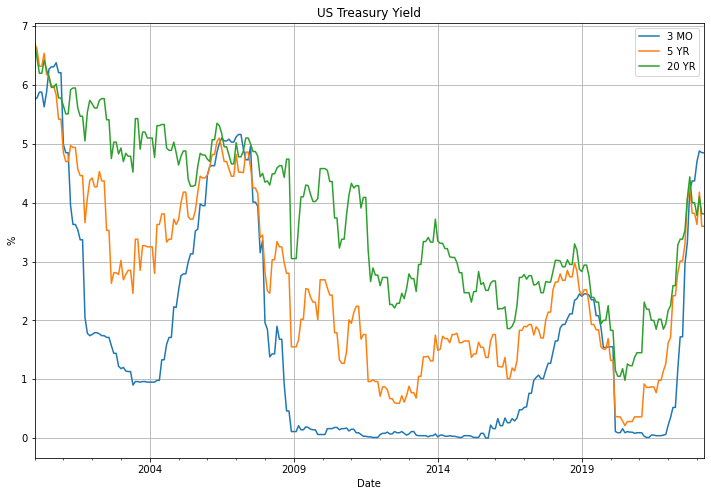

In [35]:
#Plot US Tresury yield curves
yield_curve.plot(figsize = (12,8), title = 'US Treasury Yield', ylabel = '%', grid=True)

In [36]:
#Create the difference between the long and short yield curve; You may select different long term yields (10YR, 20YR etc.)
long_short_diff = yield_curve['5 YR'] - yield_curve['3 MO']
long_short_diff.tail()

Date
2022-12-31   -0.55
2023-01-31   -1.07
2023-02-28   -0.70
2023-03-31   -1.25
2023-04-30   -1.25
Freq: M, dtype: float64

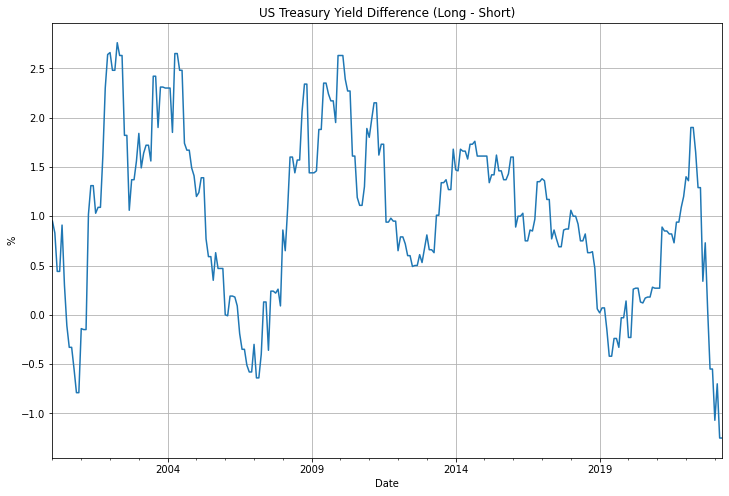

In [37]:
#Plot the difference between the long and short yield curve to identify inverted curve (y value below 0)
long_short_plot = long_short_diff.plot(figsize = (12,8), title = 'US Treasury Yield Difference (Long - Short)', ylabel = '%', grid=True)

In [42]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2000-01-01" 
end= "2023-05-02"

sp_history = yf.download(ticker, start=start, end=end, progress=False)

In [43]:
# Set frequency to Monthly; Forward fill missing values
sp_history = sp_history['Adj Close'].asfreq(freq='M').ffill()
sp_history.tail()

Date
2022-12-31    4080.110107
2023-01-31    4076.600098
2023-02-28    3970.149902
2023-03-31    4109.310059
2023-04-30    4109.310059
Freq: M, Name: Adj Close, dtype: float64

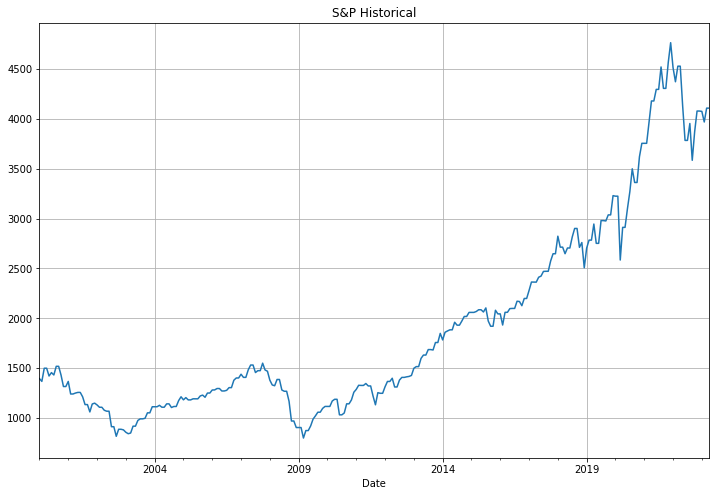

In [44]:
#Plot S&P Index historical data
sp_plot = sp_history.plot(figsize=(12,8), title='S&P Historical', grid=True)

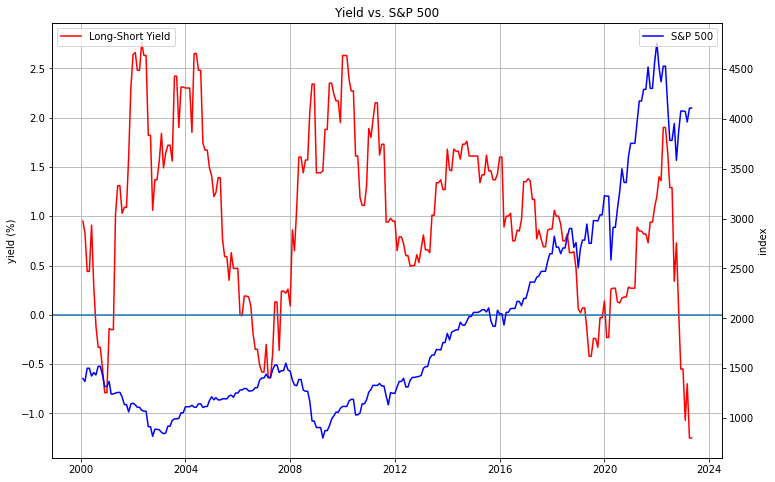

In [45]:
# Long-Short Yield Curve below 0 shows inverted curve.
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(long_short_diff, label ='Long-Short Yield', color='r')
ax.set_ylabel('yield (%)')
plt.grid()
ax.axhline(y=0)
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history, label='S&P 500', color='b')
ax.set_title('Yield vs. S&P 500')
ax2.set_ylabel('index')
ax2.legend(loc='upper right')